# Ensembles

In [1]:
#!pip install seaborn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [2]:
from IPython.core.display import Image

## Italian Olives

In [3]:
Image(url="https://dl.dropboxusercontent.com/u/75194/BDF/Italy.png")

I found this data set in the RGGobi book (http://www.ggobi.org/book/), from which the above diagram is taken. It has "the percentage composition of fatty acids
found in the lipid fraction of Italian olive oils', with oils from 3 regions of Italy: the North, the South, and Sardinia. The regions themselves are subdivided into areas as shown in the map above. The source for this data is:

>Forina, M., Armanino, C., Lanteri, S. & Tiscornia, E. (1983), Classification of Olive Oils from their Fatty Acid Composition, in Martens, H. and
Russwurm Jr., H., eds, Food Research and Data Analysis, Applied Science
Publishers, London, pp. 189–214.

In [3]:
df=pd.read_csv("data/local-olives-cleaned.csv")
df.head(5)

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29,South
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29,South
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29,South
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35,South
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46,South


### exploring globally

In [5]:
pd.crosstab(df.areastring, df.regionstring)

regionstring,North,Sardinia,South
areastring,,,
Calabria,0,0,56
Coast-Sardinia,0,33,0
East-Liguria,50,0,0
Inland-Sardinia,0,65,0
North-Apulia,0,0,25
Sicily,0,0,36
South-Apulia,0,0,206
Umbria,51,0,0
West-Liguria,50,0,0


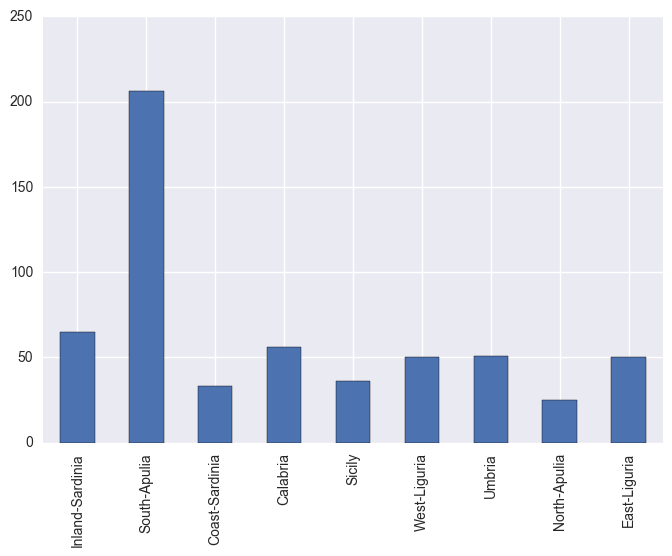

In [6]:
pd.value_counts(df.areastring, sort=False).plot(kind="bar");

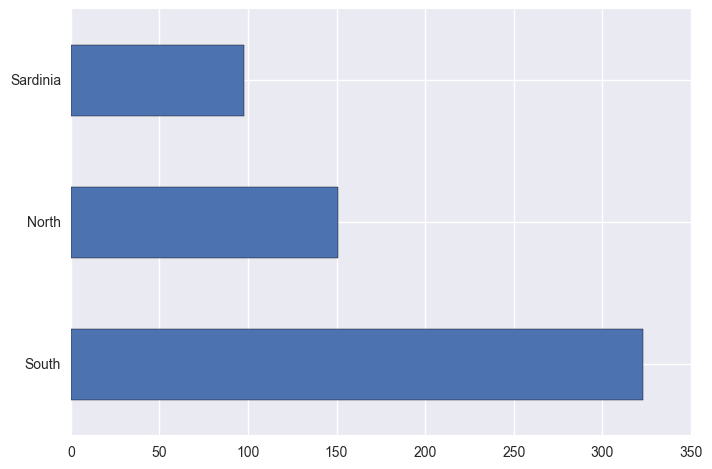

In [7]:
pd.value_counts(df.regionstring, sort=False).plot(kind="barh");

In [8]:
df.describe()

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.699301,4.599650,12.317413,1.260944,2.288654,73.117483,9.805280,0.318881,0.580979,0.162815
std,0.859968,2.356687,1.685923,0.524944,0.367449,4.058102,2.427992,0.129687,0.220302,0.140833
min,1.000000,1.000000,6.100000,0.150000,1.520000,63.000000,4.480000,0.000000,0.000000,0.010000
25%,1.000000,3.000000,10.950000,0.877500,2.050000,70.000000,7.707500,0.260000,0.500000,0.020000
50%,1.000000,3.000000,12.010000,1.100000,2.230000,73.025000,10.300000,0.330000,0.610000,0.170000
75%,3.000000,7.000000,13.600000,1.692500,2.490000,76.800000,11.807500,0.402500,0.700000,0.280000
max,3.000000,9.000000,17.530000,2.800000,3.750000,84.100000,14.700000,0.740000,1.050000,0.580000


In [9]:
df.columns

Index([u'areastring', u'region', u'area', u'palmitic', u'palmitoleic', u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic', u'eicosenoic', u'regionstring'], dtype='object')

In [10]:
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']

## Figuring the South of Italy by Area

In [11]:
dfsouth=df[df.regionstring=='South']
dfsouth.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29,South
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29,South
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29,South
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35,South
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46,South


In [13]:
dfnosouth=df[df.regionstring!='South']
dfnosouth.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02,Sardinia
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03,Sardinia
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03,Sardinia
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02,Sardinia
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01,Sardinia


## Southern areas: Descision Trees and Random Forests.

Descision trees are very simple things we are all familiar with. If a problem is multi-dimensional, the tree goes dimension by dimension and makes cuts in the space to create a classifier.

![](http://scikit-learn.org/stable/_images/iris.svg)

Building a decision tree isn't really much harder than reading one, here's the essential rundown:

Let's say we're building a classification tree by considering a list of predictors. Say we want to be able to classify olive regions from the fatty acid levels. These are all continuous variables, generically let's call them $X_{i1}, X_{i2}, ..., X_{ip}$. We also have an observed label $Y_i$ for each olive oil. 

We first assign everyone to the same class, say $\hat{Y}_i = 1$. We can calculate the squared error $Err = \sum_i {(\hat{Y}_i - Y_i)^2}$

- At **each step** of the algorithm we consider a list of possible decision (or split), for example $X_{10} > 12$, i.e. oleic is greater than 12%.
- For each possible decision we recalculate the predictor for that rule, for example $\hat{Y}_i = 1$ if $X_{10} > 12$ and $0$ otherwise.
- We recalculate the error for each possible decision
- We choose the decision that reduces the error by the largest amount
- then keep going...

<img src="../day4/images/Decision_tree.png">

In [14]:
def classify_tree(indf, inacidlist, clon, clf, train_size=0.6):
    subdf=indf[inacidlist]
    subdfstd=(subdf - subdf.mean())/subdf.std()
    X=subdfstd.values
    y=indf[clon].values
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [15]:
#from Jake's ESAC notebook
def visualize_tree(estimator, Xtr, ytr, Xte, yte, boundaries=True,
                   xlim=None, ylim=None):
    estimator.fit(Xtr, ytr)

    if xlim is None:
        xlim = (Xtr[:, 0].min() - 0.1, Xtr[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (Xtr[:, 1].min() - 0.1, Xtr[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')
    plt.clim(ytr.min(), ytr.max())

    # Plot also the training points
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=50, cmap='rainbow')
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte, s=50, marker='s', cmap='rainbow')

    plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(ytr.min(), ytr.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [17]:
dfsouthns=dfsouth[dfsouth.areastring!='Sicily']

Accuracy on training data: 1.00
Accuracy on test data:     0.88


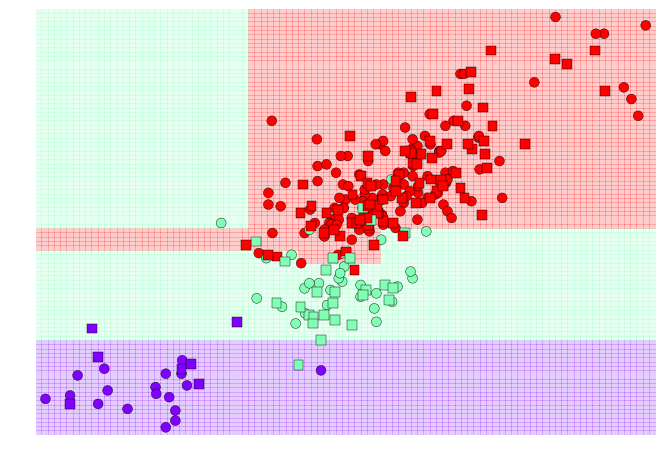

In [20]:
clf = DecisionTreeClassifier()
clf, xtr, ytr, xte, yte = classify_tree(dfsouthns, ['palmitic','palmitoleic'], 'area', clf)
visualize_tree(clf, xtr, ytr, xte, yte, boundaries=False)

One critical byproduct we get from trees is feature importances

In [21]:
list(zip(['palmitic','palmitoleic'],clf.feature_importances_))

[('palmitic', 0.10558260755821046), ('palmitoleic', 0.89441739244178964)]

Run again and again and see the overfit. **This Cries Overfit**. So why use it?

Accuracy on training data: 0.99
Accuracy on test data:     0.91


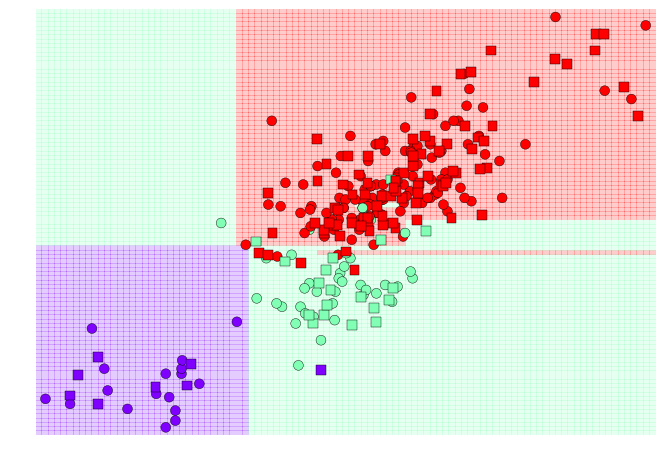

In [22]:
clf = DecisionTreeClassifier()
clf, xtr, ytr, xte, yte = classify_tree(dfsouthns, ['palmitic','palmitoleic'], 'area', clf)
visualize_tree(clf, xtr, ytr, xte, yte, boundaries=False)

We use it to create a **random forest** from a set of trees. 

The idea of random forests arises naturally by first considering Tree bagging. In tree bagging we do the following:

1. Take a random subsample of your data, with replacement
2. Build a classification (or regression) tree 
3. repeat

For a new data point we can then simply run that point through all the trees constructed, get all the decisions, and take a majority vote. This form of averaging gets rid of some of the over-fitting issues found in just using one tree. 

### Random Forest

This method is very similar to the bootstrap aggregation method. However, as the name suggests some extra randomness is injected into the building of the trees. It turns out that the trees that are build from the random subsample of your data are quite similar, so the solution is quite simple.

1. Take a random subsample of your data
2. Select m variables (features) at random out of all M possible variables (independently for each node).
3. Find the best split on the selected m variables. Build out the entire tree.
4. repeat

We take a majority vote the same as before. Have a look at the help page for the Random Forest Classifier, we'll be optimizing two options: `n_estimators` - the number of trees in the forest (although after a bit of experimentation you fill find that there is a flattening of performance over a few 100 trees), `max_features` - the number of features to consider when looking for the best split (step 2 above).


![random forest](https://dl.dropboxusercontent.com/u/75194/BDF/randforest.png)

When we do this we get trees lke the ones seen in the diagram above. What we do now, is that for each region of the space (on some suitable grid) we find out what result each tree gives us. Then we go majority vote, like in kNN. This process of resampling and averaging over the trees reduces the overfitting a bit.
For two features the second dosent make a huge amount of sense, but lets see it as we can see that the overfitting is softened a bit by the averaging:

Accuracy on training data: 1.00
Accuracy on test data:     0.93


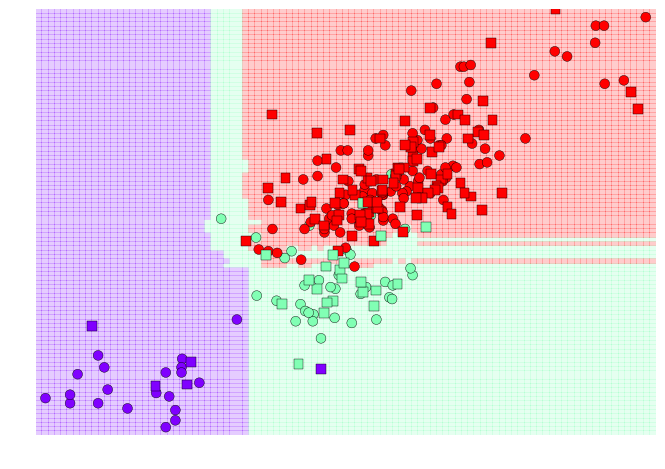

In [24]:
clf=RandomForestClassifier(n_estimators=100)
clf, Xtrain, ytrain, Xtest, ytest=classify_tree(dfsouthns, ['palmitic','palmitoleic'],'area',clf)
visualize_tree(clf, Xtrain, ytrain, Xtest, ytest, boundaries=False)

Lets run it on the entire set of features

In [25]:
clf=RandomForestClassifier(n_estimators=300)
clf, Xtrain, ytrain, Xtest, ytest=classify_tree(dfsouthns, acidlist,'area',clf)

Accuracy on training data: 1.00
Accuracy on test data:     0.97


In [26]:
list(zip(acidlist,clf.feature_importances_))

[('palmitic', 0.11360412386694439),
 ('palmitoleic', 0.23635359905220735),
 ('stearic', 0.068358662772719722),
 ('oleic', 0.2214385831174244),
 ('linoleic', 0.25090449748799593),
 ('linolenic', 0.065990403301870601),
 ('arachidic', 0.028106964289411115),
 ('eicosenoic', 0.015243166111426442)]

In [27]:
clf=RandomForestClassifier(n_estimators=300)
clf, Xtrain, ytrain, Xtest, ytest=classify_tree(dfsouth, acidlist,'area',clf)

Accuracy on training data: 1.00
Accuracy on test data:     0.96


In [39]:
list(zip(acidlist,clf.feature_importances_))

[('palmitic', 0.11507865159520941),
 ('palmitoleic', 0.24674931737493699),
 ('stearic', 0.082805529690167051),
 ('oleic', 0.13814708727603592),
 ('linoleic', 0.16943749670514779),
 ('linolenic', 0.095441493171310038),
 ('arachidic', 0.064354755456165549),
 ('eicosenoic', 0.087985668731027061)]

### Cross-validation is not needed

except to fit hyperparams, `n_estimators` and `max_features` (add in here). This is because re-sampling is built in via the bootstrap.

In [43]:
def classify_tree_on_full(indf, inacidlist, clon, clf):
    subdf=indf[inacidlist]
    subdfstd=(subdf - subdf.mean())/subdf.std()
    X=subdfstd.values
    y=indf[clon].values
    clf=clf.fit(X, y)
    training_accuracy = clf.score(X, y)
    test_accuracy = clf.oob_score_
    print("Accuracy on all data: %0.2f" % (training_accuracy))
    print("Accuracy on oob data:     %0.2f" % (test_accuracy))
    return clf, test_accuracy

In [44]:
newclf=RandomForestClassifier(oob_score=True, n_estimators=300)
newclf, _=classify_tree_on_full(dfsouth, acidlist, 'area', newclf)
list(zip(acidlist,newclf.feature_importances_))

Accuracy on all data: 1.00
Accuracy on oob data:     0.94


[('palmitic', 0.098439647001173677),
 ('palmitoleic', 0.20665325043167068),
 ('stearic', 0.094128376386653473),
 ('oleic', 0.20703099589208082),
 ('linoleic', 0.18657649430251869),
 ('linolenic', 0.07606873228534157),
 ('arachidic', 0.066369830947101208),
 ('eicosenoic', 0.064732672753460022)]

In [45]:
#this is a shortcut. You should do full c-val
accus=[]
params=[]
nrange=range(50, 250, 10)
fsplit=range(3,len(acidlist))
print(len(nrange), len(fsplit))
for i,n in enumerate(nrange):
    for j,m in enumerate(fsplit):
        newclf=RandomForestClassifier(oob_score=True, n_estimators=n, max_features=m)
        newclf, a=classify_tree_on_full(dfsouth, acidlist, 'area', newclf)
        accus.append(a)
        params.append((n,m))
#plt.plot(nrange, accus[3,:]);


20 5
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.91
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.91
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.91
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy 

In [115]:
np.argmax(accus), params[np.argmax(accus)]

(47, (140, 5))

In [116]:
n,m = params[np.argmax(accus)]
newclf=RandomForestClassifier(oob_score=True, n_estimators=n, max_features=m)
newclf, a=classify_tree_on_full(dfsouth, acidlist, 'area', newclf)

Accuracy on all data: 1.00
Accuracy on oob data:     0.92


In [117]:
newclf.oob_score_

0.91640866873065019

24 5
Accuracy on all data: 0.99
Accuracy on oob data:     0.88
Accuracy on all data: 1.00
Accuracy on oob data:     0.91
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92


//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Accuracy on all data: 1.00
Accuracy on oob data:     0.90
Accuracy on all data: 1.00
Accuracy on oob data:     0.91
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.93
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on all data: 1.00
Accuracy on oob data:     0.92
Accuracy on al

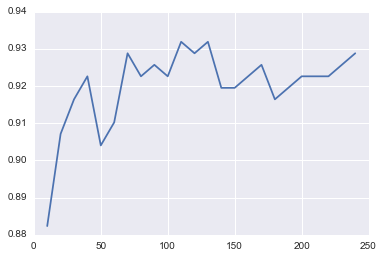

In [121]:
#this is a shortcut. You should do full c-val
accus=[]
nrange=range(10, 250, 10)
print(len(nrange), len(fsplit))
for i,n in enumerate(nrange):
    newclf=RandomForestClassifier(oob_score=True, n_estimators=n, max_features=5)
    newclf, a=classify_tree_on_full(dfsouth, acidlist, 'area', newclf)
    accus.append(a)
plt.plot(nrange, accus);

Sometimes it helps to just do a binary classification. 

YOUR TURN NOW
> Write `def classify_tree_on_full_binary(indf, inacidlist, clon, clonval, clf)` in analogy with `classify_tree_on_full` above. The additional argument is `clonval`: its a sample for which if a sample has `clon` to be `clonval`, then the sample is thought to be "positive"; else its negative.

In [46]:
#def classify_tree_on_full_binary(indf, inacidlist, clon, clonval, clf):
#your code here
def classify_tree_on_full_binary(indf, inacidlist, clon, clonval, clf):
    subdf=indf[inacidlist]
    subdfstd=(subdf - subdf.mean())/subdf.std()
    X=subdfstd.values
    y=(indf[clon].values==clonval)*1
    clf=clf.fit(X, y)
    training_accuracy = clf.score(X, y)
    test_accuracy = clf.oob_score_
    print("Accuracy on all data: %0.2f" % (training_accuracy))
    print("Accuracy on oob data:     %0.2f" % (test_accuracy))
    return clf, test_accuracy

In [47]:
newclf=RandomForestClassifier(oob_score=True, n_estimators=100)
newclf, _=classify_tree_on_full_binary(dfsouth, acidlist, 'area', 3, newclf)

Accuracy on all data: 1.00
Accuracy on oob data:     0.96


### A regression example

(taken from http://nbviewer.jupyter.org/github/jakevdp/sklearn_pycon2015/blob/master/notebooks/03.2-Regression-Forests.ipynb , Copyright (c) 2015, Jake Vanderplas
)

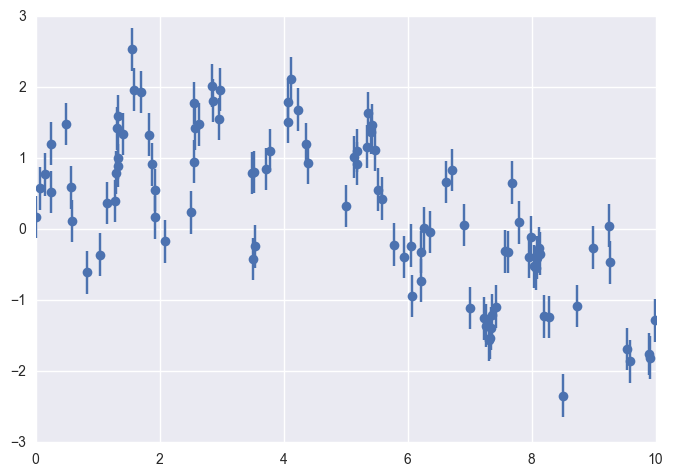

In [30]:
x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Just to illustrate, we'll do the fits with no cval, and no hyperparameter optimization.

Here is an illustration of how these work(from https://www.quora.com/How-does-random-forest-work-for-regression-1): <img src="https://qph.ec.quoracdn.net/main-qimg-0e6c24c764d66acef53450872de50dc4?convert_to_webp=true">

In [49]:
from sklearn.ensemble import RandomForestRegressor
xfit = np.linspace(0, 10, 1000).reshape(-1,1)#TEST SET
yfit = RandomForestRegressor(100).fit(x.reshape(-1,1), y).predict(xfit)


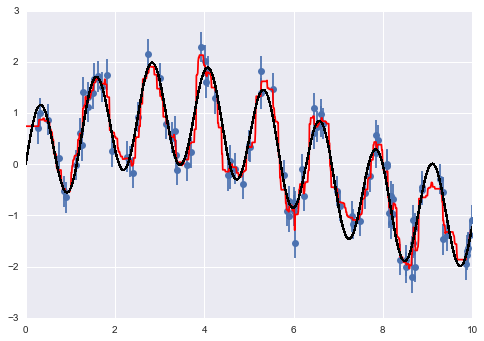

In [50]:
ytrue = model(xfit, 0)
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.02);

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from collections import Counter
import numpy as np


def initialize(context):

    context.stocks = symbols('XLY',  # XLY Consumer Discrectionary SPDR Fund   
                           'XLF',  # XLF Financial SPDR Fund  
                           'XLK',  # XLK Technology SPDR Fund  
                           'XLE',  # XLE Energy SPDR Fund  
                           'XLV',  # XLV Health Care SPRD Fund  
                           'XLI',  # XLI Industrial SPDR Fund  
                           'XLP',  # XLP Consumer Staples SPDR Fund   
                           'XLB',  # XLB Materials SPDR Fund  
                           'XLU')  # XLU Utilities SPRD Fund
    
    context.historical_bars = 100
    context.feature_window = 10
    

   

def handle_data(context, data):
    prices = history(bar_count = context.historical_bars, frequency='1d', field='price')

    for stock in context.stocks:
        try:
            ma1 = data[stock].mavg(50)
            ma2 = data[stock].mavg(200)

            start_bar = context.feature_window
            price_list = prices[stock].tolist()

            X = []
            y = []

            bar = start_bar

            # feature creation
            while bar < len(price_list)-1:
                try:
                    end_price = price_list[bar+1]
                    begin_price = price_list[bar]

                    pricing_list = []
                    xx = 0
                    for _ in range(context.feature_window):
                        price = price_list[bar-(context.feature_window-xx)]
                        pricing_list.append(price)
                        xx += 1

                    features = np.around(np.diff(pricing_list) / pricing_list[:-1] * 100.0, 1)


                    #print(features)

                    if end_price > begin_price:
                        label = 1
                    else:
                        label = -1

                    bar += 1
                    X.append(features)
                    y.append(label)

                except Exception as e:
                    bar += 1
                    print(('feature creation',str(e)))




            clf = RandomForestClassifier()

            last_prices = price_list[-context.feature_window:]
            current_features = np.around(np.diff(last_prices) / last_prices[:-1] * 100.0, 1)

            X.append(current_features)
            X = preprocessing.scale(X)

            current_features = X[-1]
            X = X[:-1]

            clf.fit(X,y)
            p = clf.predict(current_features)[0]

            print(('Prediction',p))

        except Exception as e:
            print(str(e))
            
            
    record('ma1',ma1)
    record('ma2',ma2)
    record('Leverage',context.account.leverage)